In [134]:
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn import metrics

# To plot the graphs in the notebook
%matplotlib inline

In [135]:
# Importing the dataset
dataset = pd.read_csv('brain_stroke.csv')
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [136]:
# Checking for missing values
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [137]:
# Checking for duplicate values
dataset.duplicated().sum()

0

In [153]:
# replace the target values with  Yes/No
dataset['stroke'] = dataset['stroke'].replace({1:'Yes', 0:'No'})

# replace the gender values with 0/1
dataset['gender'] = dataset['gender'].replace({'Male': 0, 'Female': 1})

# replace the ever_married values with 0/1
dataset['ever_married'] = dataset['ever_married'].replace({'No': 0, 'Yes': 1})

# replace the work_type values with 0/1/2/3/4
dataset['work_type'] = dataset['work_type'].replace({'children': 0, 'Govt_job': 1, 'Never_worked': 2, 'Private': 3, 'Self-employed': 4})

# replace the Residence_type values with 0/1
dataset['Residence_type'] = dataset['Residence_type'].replace({'Rural': 0, 'Urban': 1})

# replace the smoking_status values with 0/1/2/3
dataset['smoking_status'] = dataset['smoking_status'].replace({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

# replace the age values with 0/1/2/3
for row in dataset.index:
    if dataset.loc[row, 'age'] < 26:
        dataset.loc[row, 'age'] = 0
    elif dataset.loc[row, 'age'] < 46:
        dataset.loc[row, 'age'] = 1
    elif dataset.loc[row, 'age'] < 62:
        dataset.loc[row, 'age'] = 2
    elif dataset.loc[row, 'age'] < 83:
        dataset.loc[row, 'age'] = 3

dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,1,1,3,1,228.69,36.6,0,Yes
1,0,3.0,0,1,1,3,0,105.92,32.5,1,Yes
2,1,2.0,0,0,1,3,1,171.23,34.4,2,Yes
3,1,3.0,1,0,1,4,0,174.12,24.0,1,Yes
4,0,3.0,0,0,1,3,1,186.21,29.0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,1.0,0,0,0,3,0,70.15,29.8,0,No
4977,0,1.0,0,0,1,3,1,191.15,31.1,2,No
4978,1,1.0,1,0,1,1,0,95.02,31.8,2,No
4979,0,1.0,0,0,1,3,0,83.94,30.0,2,No


In [139]:
# Return numerical summary of each attribute of iris
dataset.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.583618,43.419859,0.096165,0.055210,0.658502,2.497490,0.508332,105.943562,28.498173,1.584019
std,0.493008,22.662755,0.294848,0.228412,0.474260,1.281567,0.499981,45.075373,6.790464,1.092516
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,1.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,3.000000,1.000000,91.850000,28.100000,1.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.860000,32.600000,3.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,48.900000,3.000000


In [140]:
# Return the number of unique values in each column
dataset.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [141]:
# let's check number of samples for each class of target variable
dataset['stroke'].value_counts()

No     4733
Yes     248
Name: stroke, dtype: int64

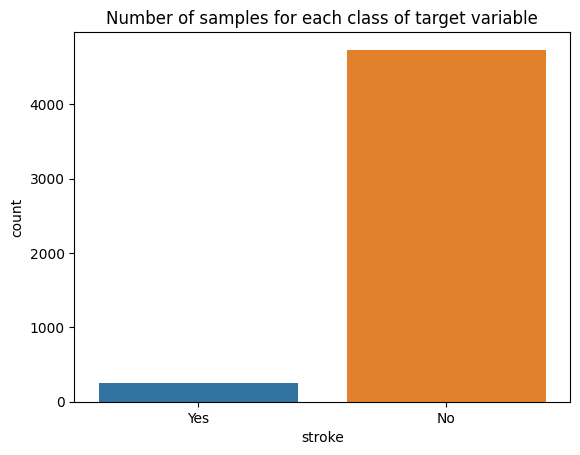

In [142]:
# let's visualise the number of samples for each class with count plot
sns.countplot(x='stroke', data=dataset) 
plt.title("Number of samples for each class of target variable");

C:\Users\mahdi\AppData\Local\Temp\ipykernel_21900\4019732388.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr().round(2)


<AxesSubplot: >

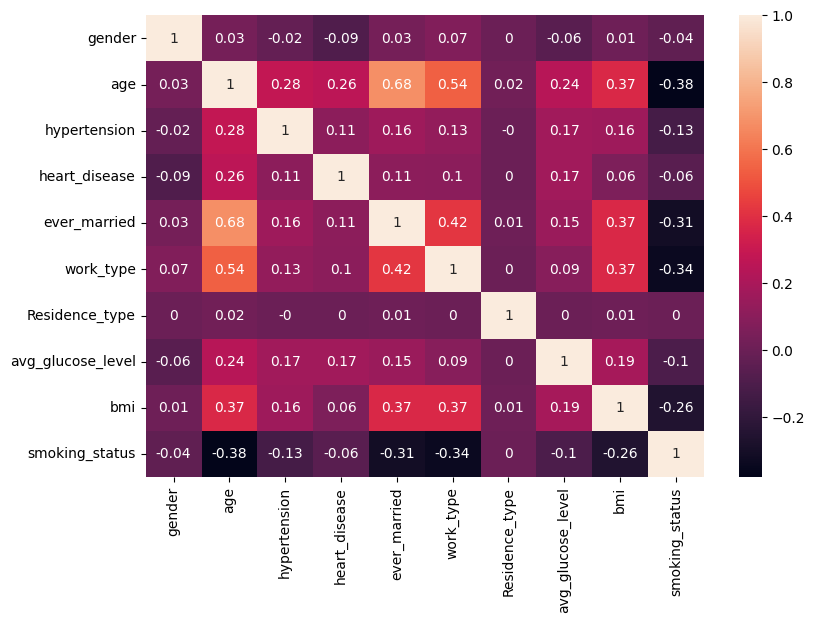

In [143]:
# corr() to calculate the correlation between variables
correlation_matrix = dataset.corr().round(2)

# changing the figure size
plt.figure(figsize=(9,6))

# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

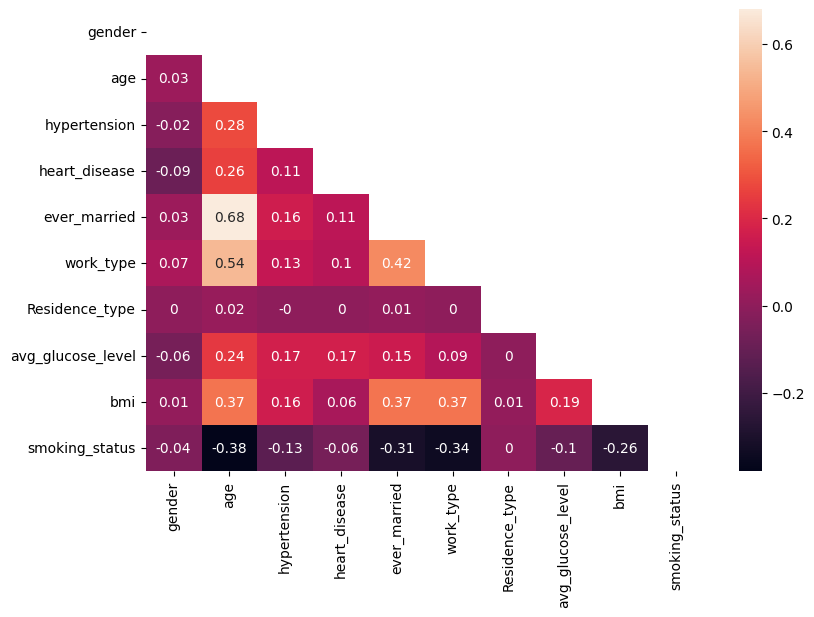

In [144]:
# Steps to remove redundant values

# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True

# changing the figure size
plt.figure(figsize=(9,6))

# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

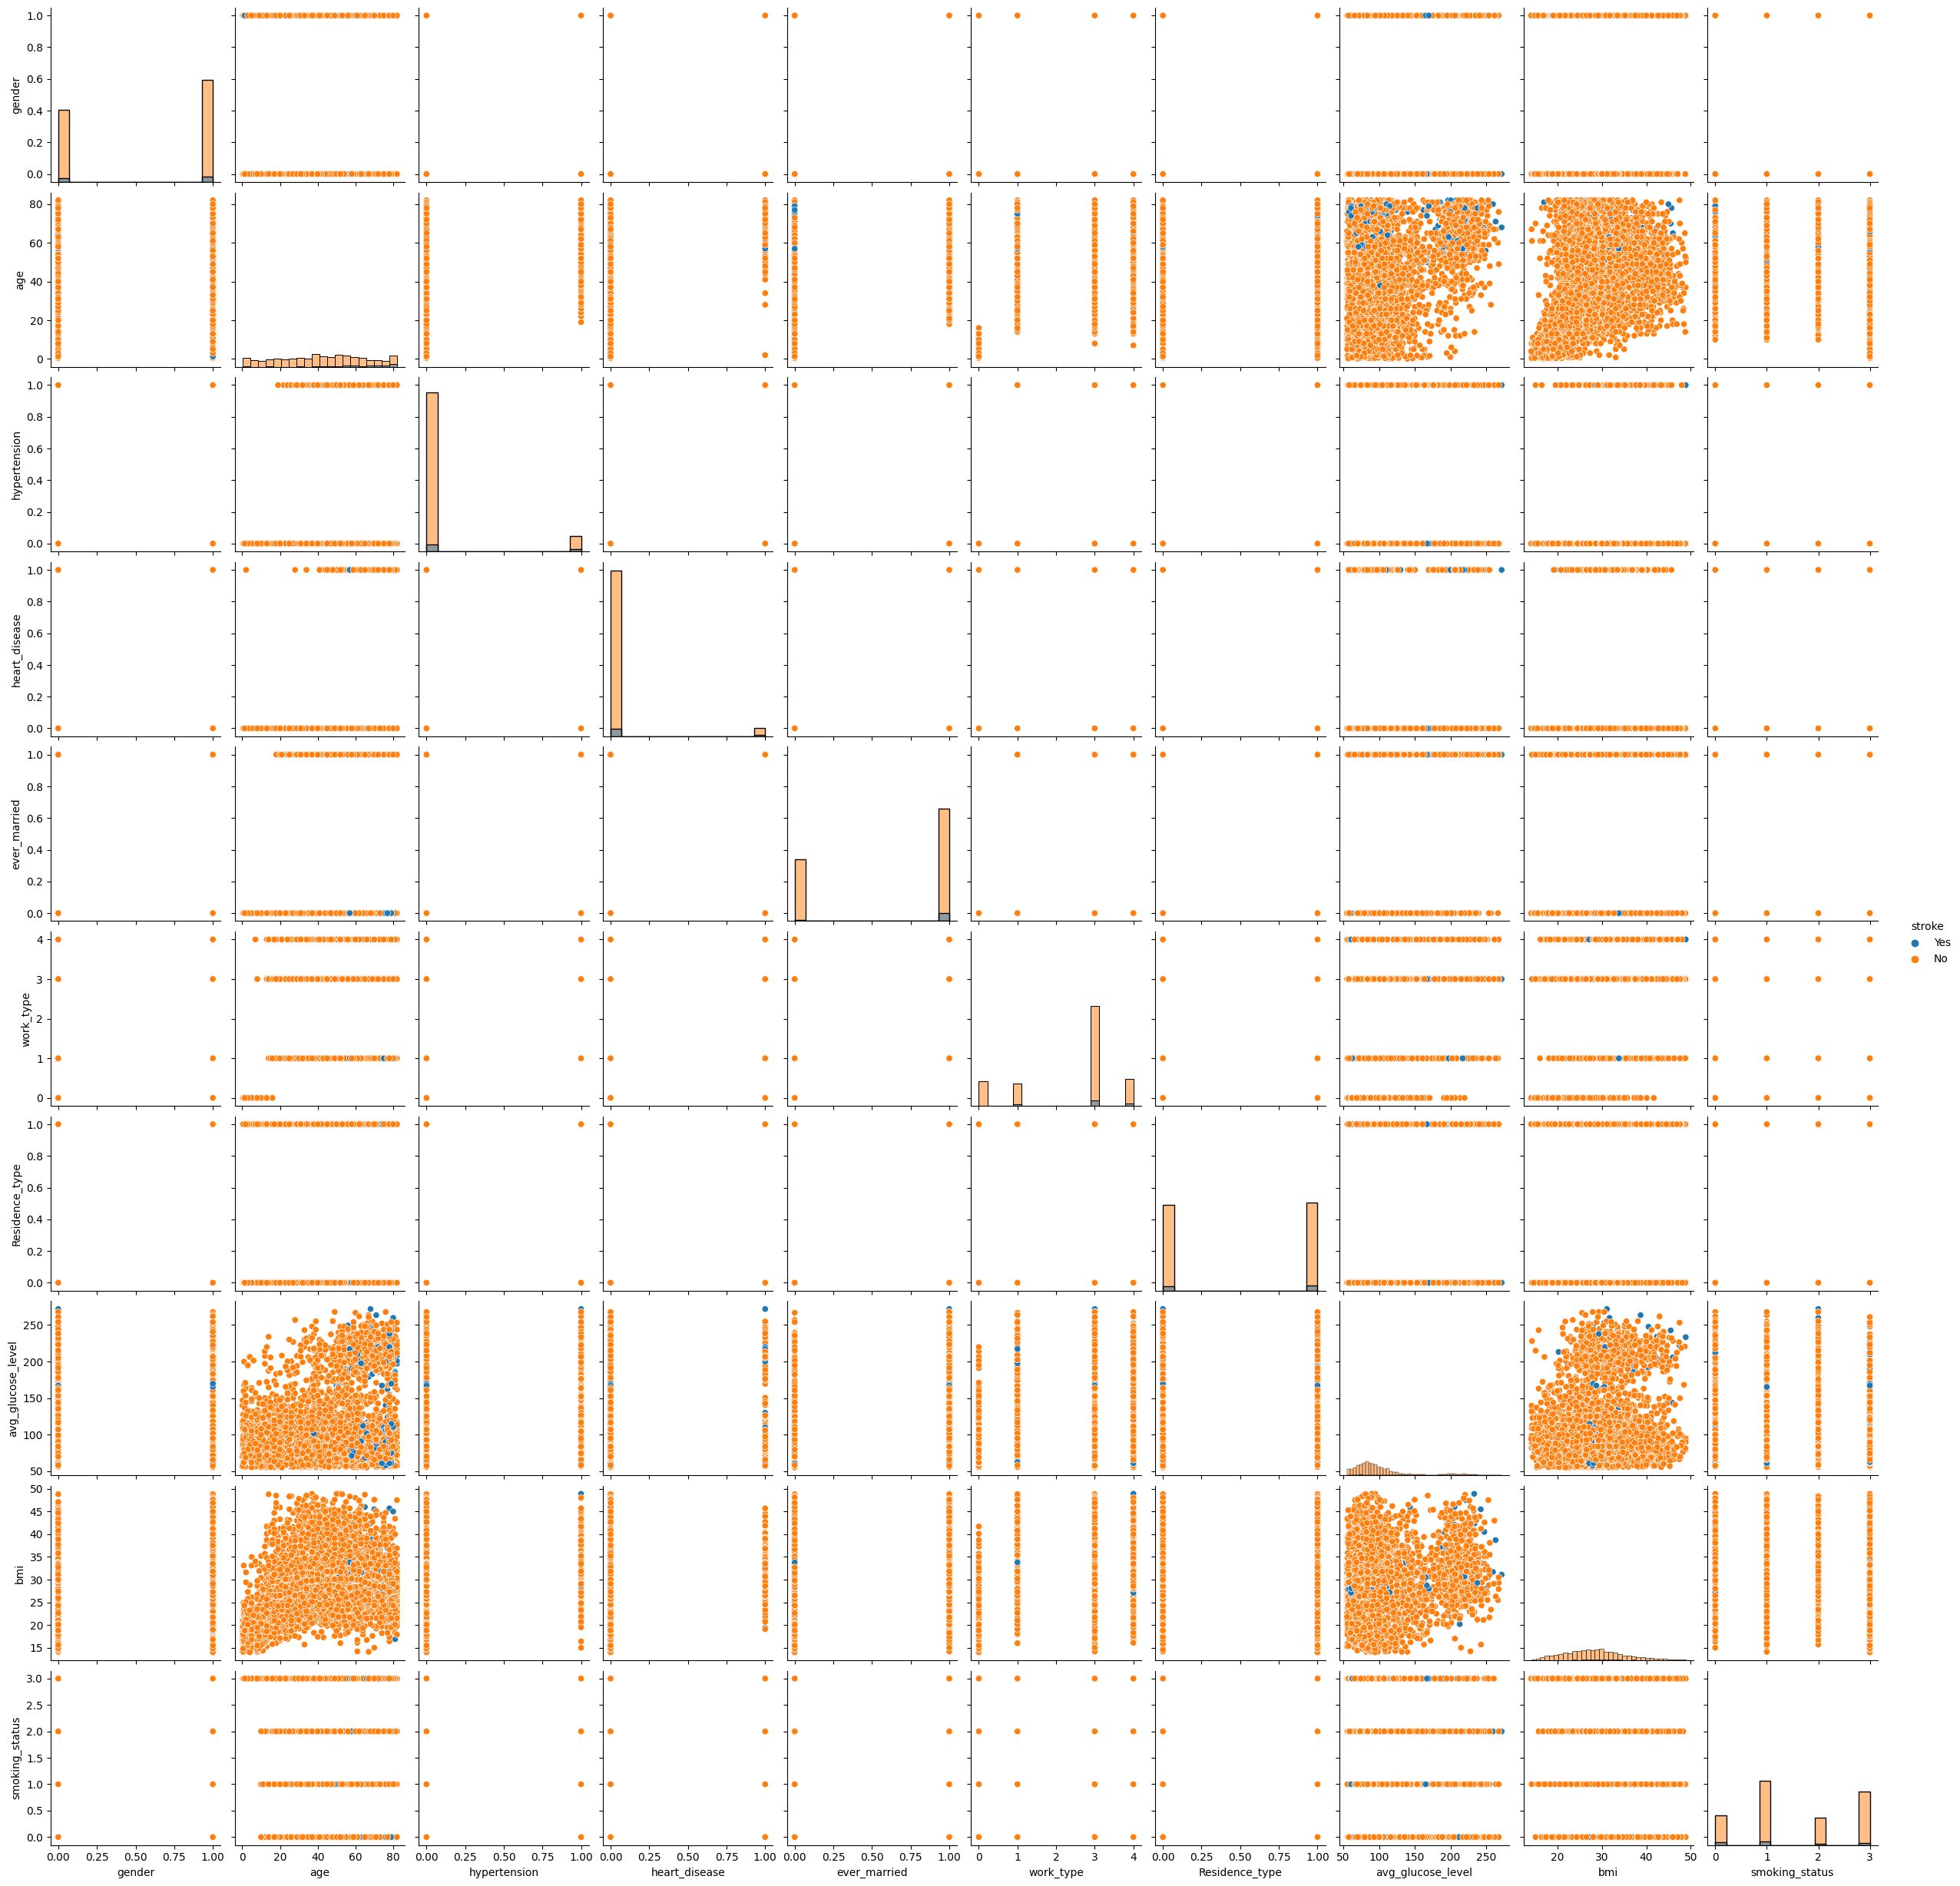

In [145]:
# let's create pairplot to visualise the data for each pair of attributes
sns.pairplot(dataset, hue='stroke', diag_kind='hist');

In [146]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.6,0,Yes
1,0,80.0,0,1,1,3,0,105.92,32.5,1,Yes
2,1,49.0,0,0,1,3,1,171.23,34.4,2,Yes
3,1,79.0,1,0,1,4,0,174.12,24.0,1,Yes
4,0,81.0,0,0,1,3,1,186.21,29.0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,0,3,0,70.15,29.8,0,No
4977,0,40.0,0,0,1,3,1,191.15,31.1,2,No
4978,1,45.0,1,0,1,1,0,95.02,31.8,2,No
4979,0,40.0,0,0,1,3,0,83.94,30.0,2,No
